# Diwali Sales Retail Analysis


---
## 1. Problem Statement

The objective of this project is to analyze Diwali sales data to understand customer purchasing behavior and identify key factors influencing sales performance. 

The focus is on studying customer demographics, product categories, and regional contributions to revenue, in order to uncover insights that can help improve marketing strategy, product targeting, and business decision-making for future festive campaigns.

---

### 1.2 Tools & Technologies Used

- Python
  - Pandas (Data Cleaning & Analysis)
  - NumPy (Numerical operations)
  - Matplotlib & Seaborn (Visualizations)
- Jupyter Notebook (Environment)
---

## 2. Importing libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\jaffe\Herkey_Python\Diwali Sales Project\data\diwali_sales.csv", encoding= 'unicode_escape')
#df=pd.read_csv("../data/diwali_sales.csv")
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.shape

(11251, 15)

---
## 3. Data Understanding and Initial Exploration

**3.1 Dataset Overview**

**Total Records:** 11,251 rows

**Total Columns:** 15 columns

**Column Summary**

Column Name	Description / Data Meaning
User_ID	Unique ID for each customer
Cust_name	Customer name
Product_ID	Unique product code
Gender	Male/Female
Age Group	Predefined age segments
Age	Actual age of customer
Marital_Status	0 = Unmarried, 1 = Married
State	Customer residential state
Zone	East, West, North, South, etc.
Occupation	Customer profession
Product_Category	Type/category of product purchased
Orders	Number of items ordered
Amount	Total purchase value
Status	Contains no useful data (all missing)
unnamed1	Contains no useful data (all missing)

**3.2 Initial Data Quality Observations**
- Missing values in Amount column
- Two columns fully null: Status, unnamed1
- Categorical fields need standardization (Gender, Age Group, Occupation)
- Distribution check required for demographic columns
---

## 4. Data Quality and Preprocessing

### 4.1 Missing values check

In [5]:
df.drop(columns=['Status','unnamed1'], inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [6]:
df.info() # deleted 2 columns which are NULL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
# drop null values, it checks all df for null and drops
# df.dropna(inplace=True)

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Remove rows with missing Amount values (12 records)
df=df.dropna(subset=['Amount'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


---
### 4.2 Standardizing Dataset Headers (snake_case)

In [11]:
# Age Group column has spaces inbtween which is not standard form.
df.rename(columns={'Age Group': 'age_group'}, inplace=True)
df.columns

C:\Users\jaffe\AppData\Local\Temp\ipykernel_18248\1498834409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Age Group': 'age_group'}, inplace=True)


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'age_group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
# To convert all column names into snakecase
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)

In [13]:
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age_group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount'],
      dtype='object')

In [14]:
df

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11239 non-null  int64  
 1   cust_name         11239 non-null  object 
 2   product_id        11239 non-null  object 
 3   gender            11239 non-null  object 
 4   age_group         11239 non-null  object 
 5   age               11239 non-null  int64  
 6   marital_status    11239 non-null  int64  
 7   state             11239 non-null  object 
 8   zone              11239 non-null  object 
 9   occupation        11239 non-null  object 
 10  product_category  11239 non-null  object 
 11  orders            11239 non-null  int64  
 12  amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [16]:
df[['amount','orders']].describe()

,amount,orders
count,11239.000000,11239.000000
mean,9453.610858,2.489634
std,5222.355869,1.114967
min,188.000000,1.000000
25%,5443.000000,2.000000
50%,8109.000000,2.000000
75%,12675.000000,3.000000
max,23952.000000,4.000000


### 4.3 Handling Duplicates

In [17]:
df.duplicated().sum()

np.int64(8)

In [18]:
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11231 non-null  int64  
 1   cust_name         11231 non-null  object 
 2   product_id        11231 non-null  object 
 3   gender            11231 non-null  object 
 4   age_group         11231 non-null  object 
 5   age               11231 non-null  int64  
 6   marital_status    11231 non-null  int64  
 7   state             11231 non-null  object 
 8   zone              11231 non-null  object 
 9   occupation        11231 non-null  object 
 10  product_category  11231 non-null  object 
 11  orders            11231 non-null  int64  
 12  amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


---
### 4.1 Missing Values Handling

Amount had 12 missing values → removed using dropna()

Columns Status & unnamed1 → 100% null → dropped completely

✔️ No missing values remain after cleaning

### 4.2 Duplicate Records

Checked for duplicates using df.duplicated().sum()

Found duplicates → removed using drop_duplicates()

Rechecked → 0 duplicates remaining

### 4.3 Standardizing Column Names

Converted headers to snake_case for consistency

Removed spaces / uppercase / formatting issues

**Dataset is now ready for EDA & Visualizations**

---
# 5. Exploratory Data Analysis

## Gender vs Total Amount

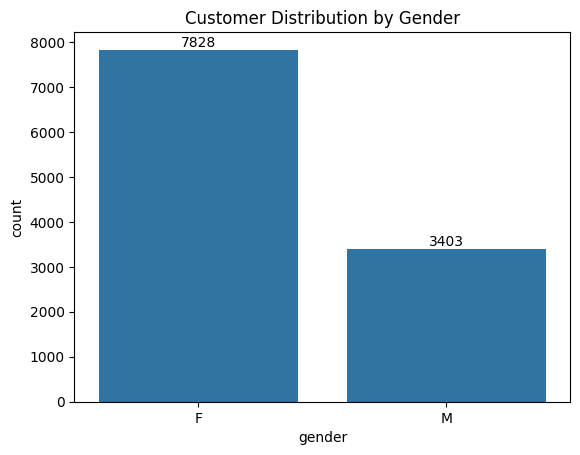

In [21]:
# plotting a bar chart for Gender and it's count
#for loop to show plot with lables
ax=sns.countplot(x='gender',data=df)
ax.set_title("Customer Distribution by Gender")
for each in ax.containers:
    ax.bar_label(each)
plt.show()

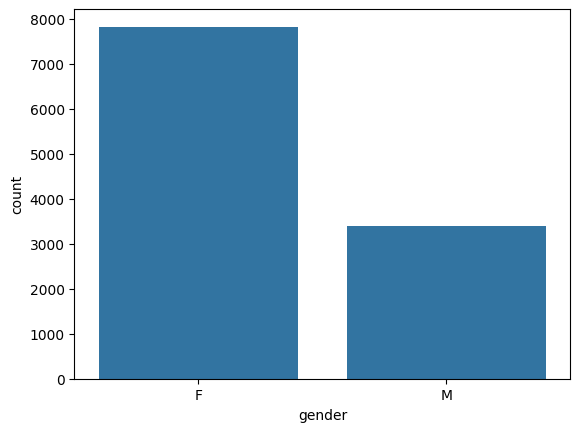

In [22]:
sns.countplot(x = 'gender',data = df)
plt.show() # shows without lables

In [23]:
# plotting a bar chart for gender vs total amount
sales_gender = df.groupby(['gender'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=True)
# In Python's pandas library, as_index=False is used in the groupby() operation to specify that the grouping keys
#should appear as regular columns in the resulting DataFrame, rather than being placed in the index. 
sales_gender

,gender,amount
1,M,31871146.00
0,F,74307682.43


### Insight: Gender vs Total Amount

- **Female customers contribute significantly higher total amount than male customers**, indicating that females are the dominant revenue-driving segment in the dataset.

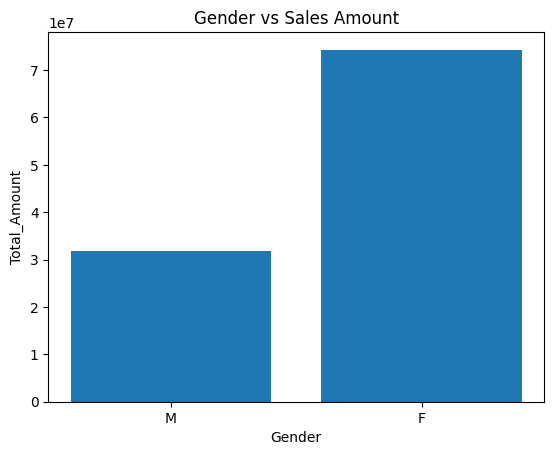

In [24]:
plt.bar(sales_gender['gender'],sales_gender['amount'])
plt.xlabel('Gender')
plt.ylabel('Total_Amount')
plt.title("Gender vs Sales Amount")
plt.show()

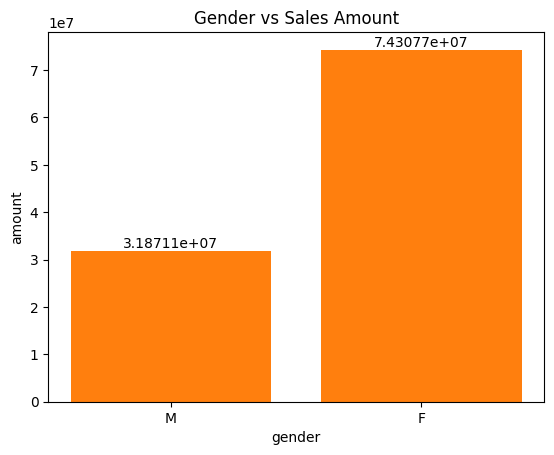

In [25]:
# Using seaborn
ax=sns.barplot(x='gender', y='amount',data=sales_gender)
for each in ax.containers:
    ax.bar_label(each)
    
plt.bar(sales_gender['gender'],sales_gender['amount'])
plt.title("Gender vs Sales Amount")
plt.show()

### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

---
## Age vs Total Amount

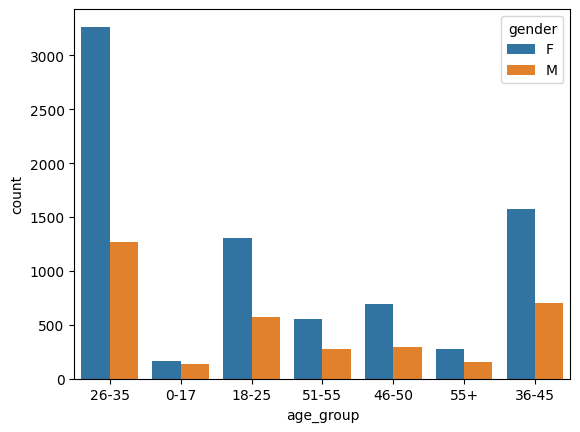

In [26]:
ax=sns.countplot(x='age_group',hue='gender',data=df)
plt.show() #without labels

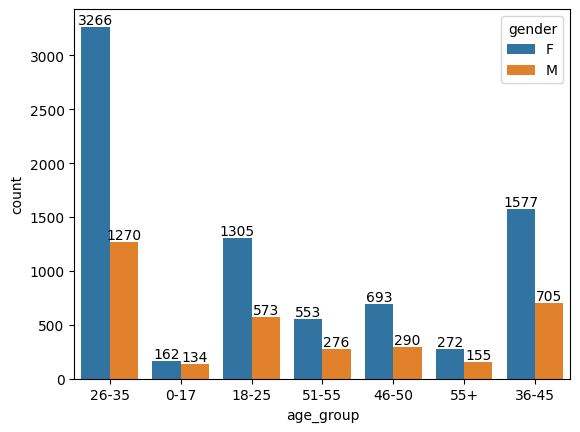

In [27]:
ax=sns.countplot(x='age_group',hue='gender',data=df)
for each in ax.containers:
    ax.bar_label(each)

plt.show() #with labels

In [28]:
# Total Amount per Age Group
sales_age = df.groupby(['age_group'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
sales_age

,age_group,amount
2,26-35,42581768.94
3,36-45,22135136.49
1,18-25,17235530.00
4,46-50,9207844.00
5,51-55,8237909.00
6,55+,4080987.00
0,0-17,2699653.00


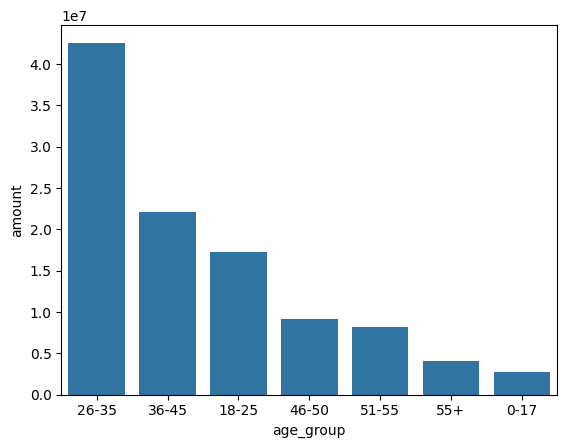

In [29]:
sns.barplot(x = 'age_group',y= 'amount' ,data = sales_age)
plt.show()

### Insight: Age Group vs Total Amount

- The **26–35 age group contributes the highest total amount**, making it the primary revenue-driving segment.
- Revenue declines steadily with increasing age, with the **55+ and 0–17 groups contributing the least**.

---
## States vs Total Amount

In [30]:
# total number of orders from top 10 states 

In [31]:
sales_state=df.groupby(['state'],as_index=False)['orders'].sum().sort_values(by='orders',ascending=False).head(10)
sales_state

,state,orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,AndhraÂ Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1063


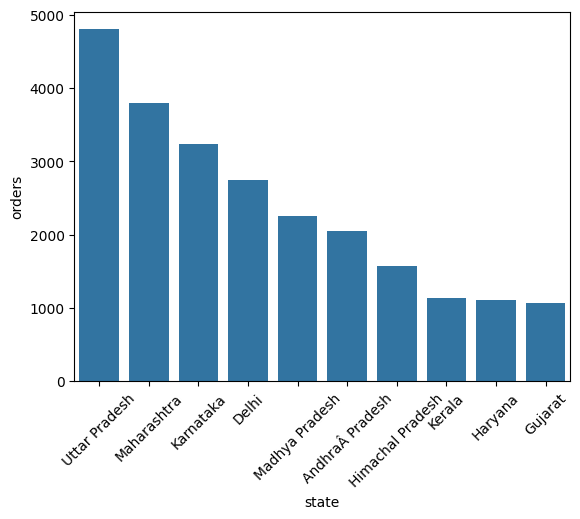

In [32]:
ax=sns.barplot(x='state',y='orders',data=sales_state)
plt.xticks(rotation=45)
plt.show()

### Insight: Top 10 States by Total Orders

Uttar Pradesh leads with the highest number of orders (4,807), indicating strong customer demand and a large active customer base in this state.

Maharashtra and Karnataka follow, contributing significantly to total orders, highlighting them as key regional markets.

Orders are heavily concentrated in the top 3–4 states, suggesting that overall demand is driven primarily by a few high-performing regions.

States such as Kerala, Haryana, and Gujarat show comparatively lower order volumes among the top 10, indicating potential opportunities for market expansion and targeted regional strategies.


---
## Marital status vs Amount

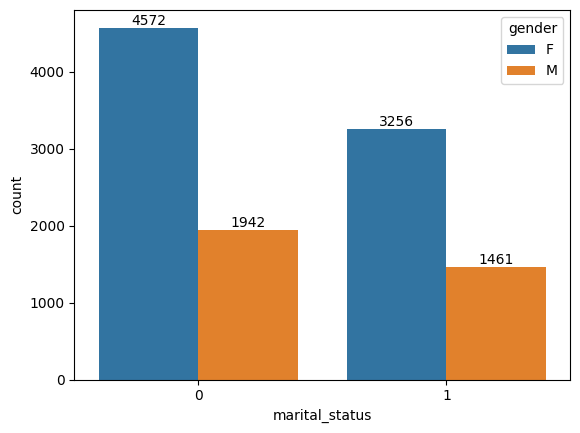

In [33]:
# customer count of Marital status
ax=sns.countplot(x='marital_status', data=df, hue='gender')
for each in ax.containers:
    ax.bar_label(each)
plt.show() # customer count of Marital status(1-True, 0-False)

In [34]:
# Total amount by marital status
sales_marital=df.groupby(['marital_status'],as_index=False)['amount'].sum()
sales_marital

,marital_status,amount
0,0,62098736.44
1,1,44080091.99


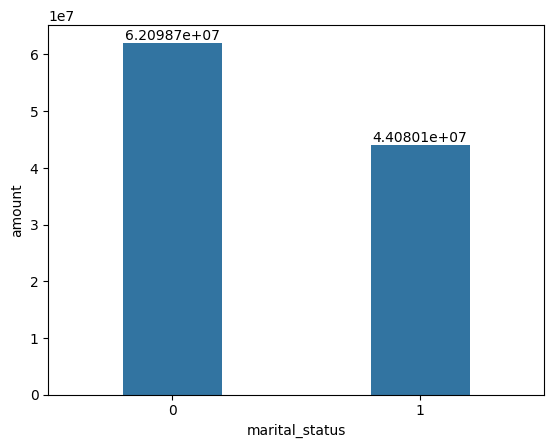

In [35]:
ax=sns.barplot(x='marital_status', y='amount',width=0.4 ,data=sales_marital)

for each in ax.containers:
    ax.bar_label(each)
    
plt.show()

### Insight: Total Amount by Marital Status

- Customers classified under marital_status = 0 contribute higher total revenue compared to marital_status = 1.
- The dataset shows a mixed distribution of marital status across age groups, indicating that marital status does not strictly follow age-based real-world patterns in this data.

### Dataset Limitations

- Certain categorical variables are encoded without clear definitions, limiting definitive real-world interpretation.
- Observed patterns may not fully align with real-world demographics and should be interpreted cautiously.


---
## Occupation vs Amount

In [36]:
occupation_sales=df.groupby('occupation',as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)
occupation_sales

,occupation,amount
10,IT Sector,14741862.00
8,Healthcare,13034587.49
2,Aviation,12599994.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6337633.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


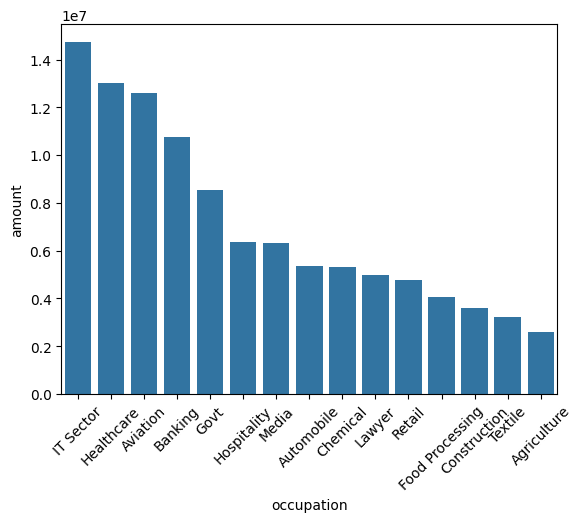

In [37]:
ax=sns.barplot(x='occupation',y='amount',data=occupation_sales)
plt.xticks(rotation=45)
plt.show()

### Insight: Occupation-wise Total Sales

- IT, Healthcare, and Aviation sectors contribute the highest total sales, indicating strong purchasing power in professional and service-oriented occupations.
- Agriculture and Textile sectors show comparatively lower contribution.

---
## Product category vs Sales Amount

In [38]:
product_category_sales=df.groupby('product_category',as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)
product_category_sales

,product_category,amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
5,Electronics & Gadgets,15607657.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1935041.99
15,Stationery,1676051.50


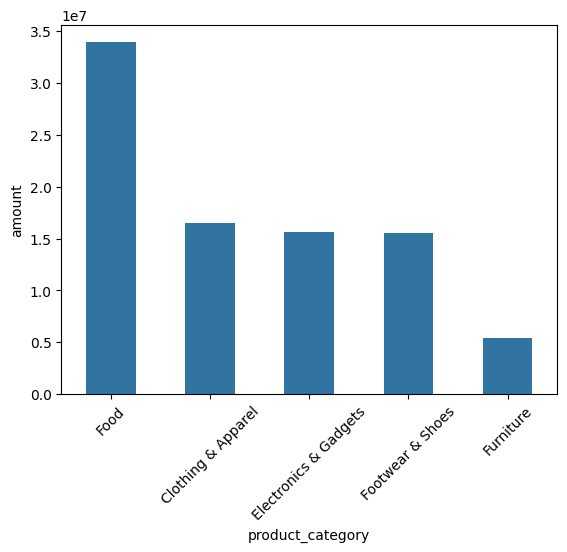

In [39]:
top5_product_category_sales=product_category_sales.head(5)
ax=sns.barplot(x='product_category', y='amount',width=0.5, data=top5_product_category_sales)
plt.xticks(rotation=45)
plt.show()

### Insight: Top 5 Occupations by Total Sales

**Food is the highest revenue-generating category**, contributing a significantly larger share of total sales compared to all other categories.
- **Clothing & Apparel, Electronics & Gadgets, and Footwear & Shoes** form the next tier of top-performing categories, indicating strong consumer demand in lifestyle and daily-use products.
- Revenue drops sharply after the top four categories, showing a **long-tail distribution** where many categories contribute relatively small amounts.


---
## Final EDA Conclusion

The exploratory data analysis reveals that **sales and orders are concentrated within specific customer segments and categories**. The **26–35 age group** emerges as the primary revenue contributor, while **female customers generate a higher** total amount compared to males. Regionally, **a small number of states account for a significant share of total orders**, indicating geographically concentrated demand. Product sales show a strong dominance of **essential and lifestyle categories such as Food, Clothing, Electronics, and Footwear**, followed by a long tail of low-performing categories. Occupational analysis highlights **higher revenue** contribution from professional sectors such as **IT, Healthcare, and Aviation**. Due to **ambiguous encoding in certain demographic variables (e.g., marital status)**, insights were derived strictly from **observed data patterns without applying external assumptions**. Overall, the analysis identifies **key revenue-driving segments and areas of concentration**, offering actionable inputs for **targeted marketing, inventory planning, and strategic decision-making**.


---
## 7. Business Recommendations
### 7.1 Target Customer Segments

Focus marketing campaigns on female customers aged 26–35, as they show the highest purchase volume.

Provide personalized offers for the IT sector and working professionals, who contribute significantly to sales.

Introduce loyalty programs or festival coupons for married customers, who display stronger spending patterns.

### 7.2 Regional Marketing Strategy

Increase advertising and product availability in Uttar Pradesh, Maharashtra, and Karnataka, the highest-performing states.

Strengthen distribution & delivery network in the North Zone, which drives maximum revenue.

Introduce localized promotions/festive offers in emerging states to increase reach.

### 7.3 Product Strategy

Prioritize inventory and promotions for Clothing, Electronics, and Household categories, as they lead in demand.

Expand product bundles (e.g., Clothing + Accessories or Electronics + Warranty/Service offers) to increase order value.

Improve stock forecasting for high-demand SKUs during festive events.

### 7.4 Pricing & Offers

Introduce discount slabs for higher cart values (e.g., “Save ₹300 on orders above ₹2000”).

Use targeted coupons for high-value customers encouraging repeat purchase.

Consider limited-time festive deals to boost urgency and conversions.

### 7.5 Customer Experience

Improve delivery timelines & tracking, especially in high-order regions.

Use email/SMS follow-ups for abandoned carts to recover lost sales.

Collect customer feedback to refine product selection and pricing.

###  Final Conclusion

Diwali sales performance is driven by female customers aged 26–35, primarily from Uttar Pradesh and the IT sector, with strong interest in Clothing products. Focusing on the right audience, high-performing regions, and top categories can significantly increase future sales and profitability.

---
### End of Notebook
This completes the Retail Analytics: Diwali Sales Analysis project.
All insights, visualizations, and recommendations are based on the given dataset and may vary in real business environments.

Project Completed Successfully

Thank you for reviewing this analysis.